In [3]:
from qwenaug.model import download_model_weights
download_model_weights('weights')


In [ ]:
from qwenaug.model import load_qwen_image_edit
import torch
import os
from PIL import Image
pipeline = load_qwen_image_edit()
image = Image.open("examples/input.jpg").convert("RGB")
prompt = "Change the rabbit's color to purple, with a flash light background."
inputs = {
    "image": image,
    "prompt": prompt,
    "generator": torch.manual_seed(0),
    "true_cfg_scale": 4.0,
    "negative_prompt": " ",
    "num_inference_steps": 20,
}

if pipeline is not None:
    print("Qwen-Image Diffusers model loaded successfully!")
    # You can now use the 'image_pipeline' object to generate images.
    # For example:
    # image = image_pipeline("A photo of a cat wearing a hat")
    # image.save("cat_with_hat.png")
else:
    print("Failed to load Qwen-Image Diffusers model.")

with torch.inference_mode():
    output = pipeline(**inputs)
    output_image = output.images[0]
    output_image.save("output_image_edit.png")
    print("image saved at", os.path.abspath("output_image_edit.png"))

In [1]:
from pycocotools.coco import COCO
coco = COCO('/home/jupyter/annotations/instances_train2017.json')



loading annotations into memory...
Done (t=11.39s)
creating index...
index created!


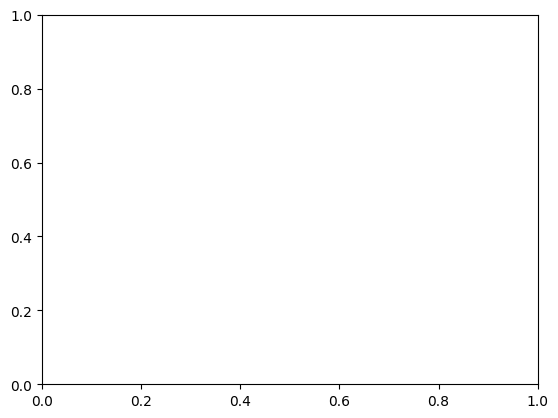

In [19]:
import random
cat_ids = coco.getCatIds(catNms=['person'])

img_ids = coco.getImgIds(imgIds=[],catIds=cat_ids)
random.shuffle(img_ids)

img = coco.imgs[img_ids[0]]

anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

http://farm4.staticflickr.com/3288/3157230778_f963689080_z.jpg


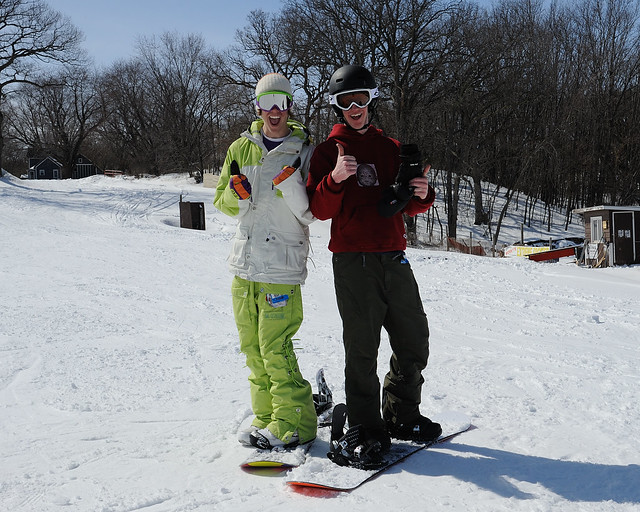

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from diffusers.utils import load_image

print(img['flickr_url'])
image = load_image(img['flickr_url'])
display(image)

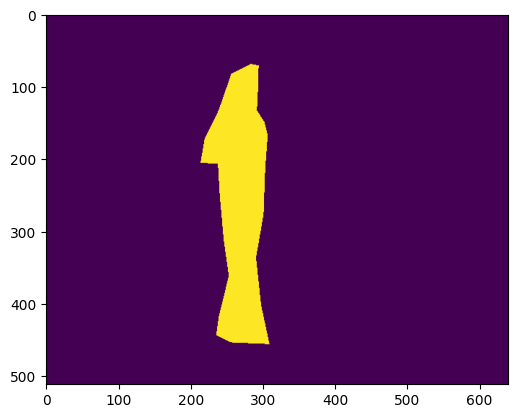

In [28]:
mask = coco.annToMask(anns[0])

plt.imshow(mask)

In [5]:
from qwenaug.model import load_flux_kontext
import torch

pipeline = load_flux_kontext()

Converting and de-quantizing GGUF tensors...:   0%|          | 0/219 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers
`torch_dtype` is deprecated! Use `dtype` instead!


In [ ]:
# image = Image.open("examples/images/input.jpg").convert("RGB")

base_image = image.convert("RGB")
overlay_image = Image.open('examples/images/hat.png').convert("RGB")
# mask_image=Image.open(pl.Path(input_path).parent.joinpath(input_path.stem + "_mask" + input_path.suffix))

# Combine base_image and overlay_image
width = base_image.width + overlay_image.width
height = max(base_image.height, overlay_image.height)
# print(base_image.width, base_image.height, overlay_image.width, overlay_image.height, width, height)
image = Image.new("RGB", (width, height))
image.paste(base_image, (0, 0))
# TODO: Add padding, center overlay
image.paste(overlay_image, (base_image.width, 0))

# mask_image = Image.open(overlay_path).convert("RGB")
prompt = 'Add the hats to the people\'s head'
print(prompt)
# Compose base image and overlay

inputs = {
    "image": image,
    "prompt": prompt,
    "generator": torch.manual_seed(0),
    "true_cfg_scale": 4.0,
    "negative_prompt": " ",
    "num_inference_steps": 50,
    "width": base_image.width,
    "height": base_image.height,
    "mask_image": mask
}

with torch.inference_mode():
    output = pipeline(**inputs)
    output_image = output.images[0]
    output_image.save('output/example1.jpg')
    # print("image saved at", output_path)

Generation `height` and `width` have been adjusted to 672 and 1536 to fit the model requirements.


Add the hat to the people's head


  0%|          | 0/50 [00:00<?, ?it/s]